# Sieci rekurencyjne (RNN)

Klasyczne sieci neuronowe mają dwie zasadnicze wady, które sprawiają, że przetwarzanie języka naturalnego z ich udziałem jest problematyczne:
<ul>
    <li>Wyuczone wagi powiązane są z konkretnymi pozycjami cechy w wektorze cech</li>
    <li>Ciężko uwzględnić relacje między cechami (n-gramy pomagają tylko trochę)</li>
</ul>

Kiedy rozważamy problemy przetwarzania języka - cechami są słowa w zdaniach, bądź jakieś statystyki powiązane ze słowami. Gramatyka większości języków (w szczególności fleksyjnych, takich jak nasz) pozwala jednak na pojawienie się istotnych wyrażeń w różnych miejscach w zdaniu. Kiedy chcielibyśmy wykonać zadanie wykrywania nazw firm w zdaniach - pozycja słowa w zdaniu dostarcza niewielu informacji o tym czy dane słowo jest rzeczywiście firmą czy nie.

**Apple** jest najlepszą firmą.

Najlepszą firmą jest **Apple**.

Najlepsza firma - to **Apple**.

Firma **Apple** jest najlepsza.

Co więcej - często wcześniejsze słowa mają wpływ na kolejne. Wyobraźmy sobie zadanie uzupełniania luki w zdaniu. 
Mamy dwa zdania:


W pracy zawodowej piszą bardzo dużo kodu, jestem [   ].

W pracy zawodowej często pomagam ludziom, jestem [   ].

Słowa poprzedzające luki pozwalają nam z dużo większym prawdopodobieństwem oszacować, że w pierwszym przypadku powinniśmy umieścić zawód programisty lub podobny, a w drugim - pielęgniarki lub podobny. Zatem poprzednie elementy sekwencji, mają wpływ na kolejne.

Pomóc w takich problemach mogą sieci rekurencyjne.

Dzisiejsze laboratoria pokażą jak zaimplementować sieć rekurencyjną od zera i jak nauczyć ją dodawania do siebie dwóch liczb reprezentowanych w postaci stringów (w formacie binarnym - jako ciągi zer i jedynek). (Np. 7="111", 5="101"). 


Dlaczego taki problem? Dodawanie dwóch reprezentacji binarnych jest bardzo prostym zadaniem, w którym sekwencja znaków jest istotna. Kiedy dodajemy dwie liczby binarne, często mamy do czynienia z potrzebą uwzględnienia bitu przeniesienia z aktualnego do kolejnego kroku (kiedy dodajemy do siebie 1 + 1) - nasza sieć neuronowa nauczy się uwzględniać informację o tym, ucząc się wykorzystania pamięci znajdującej się w warstwie ukrytej.

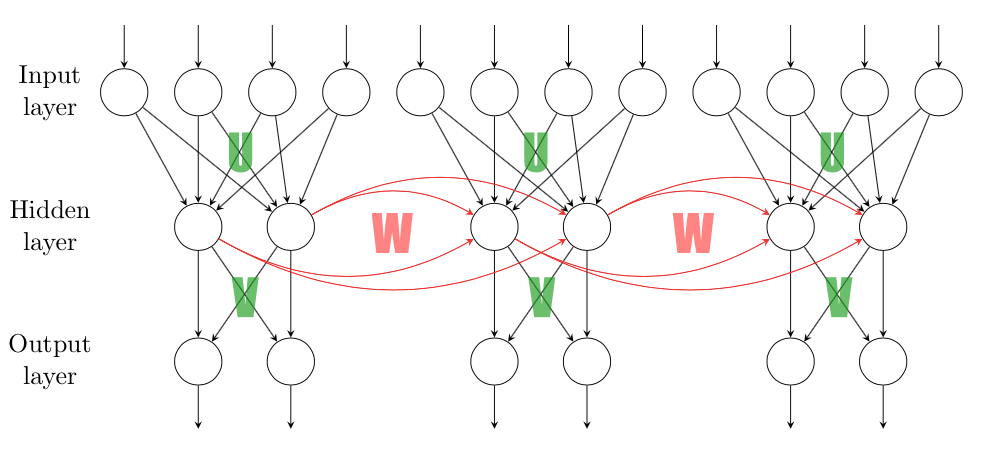

Powyższy obrazek pokazuje sieć rekurencyjną. Widzimy, że zawiera ona w sobie klasyczną sieć feedforward składającą się z 1 warstwy ukrytej (hidden layer) oraz następującej po niej warstwie wyjściowej (output layer). Aby przetworzyć sekwencję, ta sama sieć jest zwielokrotniona (w poziomie) i przetwarza po kolei każdy element z sekwencji. Na powyższym obrazku sieć feedforward (na czarno) ma 3 kopie - przetwarza więc sekwencję 3-elementową (np. 3 następujące po sobie słowa).

Przekazywanie informacji o poprzednich elementach sekwencji (np. słowach) do kolejnych następuje poprzez połączenie warstwy ukrytej w kolejnych krokach czasowych (czerwone połączenia) Warstwa ukryta powinna modelować pamięć, która może być użyta do podejmowania przyszłych decyzji. 

Literki U, V, W symbolizują macierze wag pomiędzy warstwami. U łączy warstwę wejściową z ukrytą (każdy z każdym), V - łączy ukrytą z wyjściową (każdy z każdym), a W łączy warstwę ukrytą z poprzedniego punktu w czasie z kolejnym (również każdy z każdym).

Warto zauważyć, że do przetworzenia każdego kroku sekwencji używamy dokładnie tych samych wag. Wagi U, V, W są użyte przy każdej "kopii" sieci rekurencyjnej (jak na obrazku). 

---

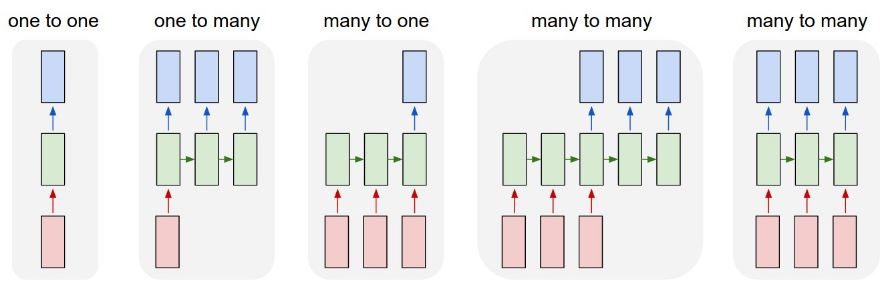

Sieci rekurencyjne stwarzają nam kilka możliwości tworzenia architektur. Powyżej zwizualizowanych jest kilka modeli z jedną warstwą ukrytą.

Dane w sekwencji następują po sobie jeden po drugim (słowa tworzą uporządkowany ciąg), każdy z elementów ciągu nadchodzi później, reprezentuje więc późniejszy punkt w czasie. Oś pozioma (od lewej do prawej) na powyższym obrazku symbolizuje upływ czasu - kolejne kroki wynikające z przyjmowania/generowania kolejnych elementów sekwencji.

Różowy prostokąt - wektor cech warstwy wejściowej, dla aktualnego punktu w czasie

Zielony prostokąt - wektor warstwy ukrytej dla aktualnego punktu w czasie

Niebieski prostokąt - wektor warstwy wyjściowej dla aktualnego punktu w czasie


<ol>
<li>one to one - klasyczna sieć feedforward, wektor cech transformowany jest do warstwy ukrytej, ta zaś transformowana jest do warstwy wyjśiowej - brak rekurencji, brak sekwencji</li>
<li>one to many - tworzenie sekwencji z pojedynczego wektora cech. Np. tworzenie opisu obrazków mając zadany 1 obrazek (opis - sekwencja wielu wyrazów, wejście 1 obrazek)</li>
<li>many to one - tworzenie pojedynczego wyjścia dla sekwencji wielu wejść. Np. Wykrywanie sentymentu w recenzji tekstowej. Z sekwencji wielu wejść (wiele słów recenzji) generujemy pojedynczą decyzję (sentyment powiązany z recenzją).</li>
<li>many to many - Z sekwencji N wejść, tworzymy sekwencję M wyjść. Np. tłumaczenie maszynowe - na wejściu sekwencja słów w jednym języku, na wyjściu zaś przetłumaczona sekwencja słów (potencjalnie o innej długości!)</li>
<li>many to many (synchronizowane) - generowanie sekwencji o długości takiej jak sekwencja wejściowa. Np. klasyfikacja kolejnych klatek wideo.</li>
</ol>

## Materiały online:
**Ponieważ, podobnie jak w przypadku poprzednich laboratoriów, najłatwiej byłoby pokazać działanie sieci rekurencyjnych przy tablicy, a trochę ciężej zrobić to za pomocą statycznych obrazków, polecam poniższy materiał na YouTube, który w intuicyjny sposób przedstawia ideę sieci rekurencyjnych i problemy z ich wykorzystaniem (https://www.youtube.com/watch?v=LHXXI4-IEns - długość ok. 10 minut)**

## Zadanie1 (1.25 pkt): Inicjalizacja wag sieci

Wagi na połączeniach między warstwami powinny być początkowo niewielkimi losowymi odchyleniami od wartości 0. W procesie uczenia wartości te modyfikować się będą tak, aby jak najdokładniej przewidywać oczekiwane wyjście.

**Wykorzystując numpy, napisz funkcję, która wygeneruje losową macierz zadanych rozmiarów (rows - liczba wierszy, cols - liczba kolumn), której wartości będą zawarte w przedziale -1 do 1.**

In [8]:
import numpy as np
np.random.seed(0)
def generate_random_matrix(rows, cols):
    return np.random.random((rows, cols))

print(generate_random_matrix(4, 3))

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]]


## Zadanie 2 (2.5 pkt): Wyznaczenie aktywacji warstwy ukrytej (pamięci) i wyjściowej

W przypadku sieci rekurencyjnych, w przeciwieństwie do klasycznych feedforward - pojawia się połączenie rekursywne z historycznymi danymi. 
Jeśli stworzymy prostą rekurencyjną sieć neuronową z jedną warstwą ukrytą, to obliczenia w tej sieci wyglądać będą następująco:

$\vec{a_{h1(t)}} = sigmoid(U\vec{x} + W\vec{a_{h1(t-1)}} + \vec{b_1})$ - aktywacja f. sigmoid jest tylko przykładem,  można użyć innej aktywacji (tanh, relu, etc)

$\vec{a_{o(t)}} = softmax(V\vec{a_{h1(t)}} + \vec{b_2})$ - softmax jest przykładem f. aktywacji, ma sens w problemie klasyfikacji przy > 2 etykietach, można również użyć np. sigmoid (jeśli jeden neuron na wyjściu)

<br/>

gdzie $\vec{a_{h1(t)}}$ to wartość wektora reprezentującego aktywację warstwy ukrytej w aktualnym kroku,

$\vec{a_{h1(t-1)}}$ to wartość aktywacji warstwy ukrytej w poprzednim kroku,

$\vec{a_{o(t)}}$ to rezultat wygenerowany przez całą sieć neuronową (aktywacja na warstwie "output")

<br/>
Poprzez uwzględnienie wartości warstwy ukrytej z poprzedniego kroku - sieć może nauczyć się w jaki sposób poprzednie dane z sekwencji wpływają na aktualną decyzję.

**Zadanie2: Mając zadane wartości macierzy wag: U, V, W a także wartości warstwy ukrytej z poprzedniego kroku oraz wektor cech - zaimplementuj dwie funkcje**:
<ol>
    <li>get_hidden_state - funkcja obliczająca aktualną wartość wektora w warstwie ukrytej (pamięć o sekwencji).</li>
    <li>get_network_output - funkcja obliczająca wyjście sieci dla aktualnie obliczonych wartości w warstwie ukrytej</li>
</ol>
Dla prostoty późniejszych obliczeń - pomińmy wektor biasów, gdyż nie jest on niezbędny do rozwiązania naszego problemu, wzór na aktywację warstwy ukrytej bez biasów: $\vec{a_{h1(t)}} = sigmoid(U\vec{x} + W\vec{a_{h1(t-1)}})$

In [10]:
# policz sigmoidę po wektorze lub skalarze
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

# policz softmax po wektorze lub skalarze
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

U = np.array([[-3., 2., ], [4., 2., ], [1., -5.,]])
W = np.array([[1.25, 1.3, 1.5], [2.01, 3.4, -2.4], [1.08, -.3, 0.1]])
V = np.array([[-0.2,0.81, -0.2], [0.12, 0.42, 0.21], [0.1, 0.32, 0.01]])

x = np.array([0.5, 0.21])
prev_hidden = np.array([0.1, 0.32, 0.01])

def get_hidden_state_activation(U, W, x, h):
    return sigmoid(np.dot(U, x) + np.dot(W, h))

def get_network_output(V, h):
    return softmax(np.dot(V, h))


hidden_state = get_hidden_state_activation(U, W, x, prev_hidden)
print(hidden_state)
print(get_network_output(V, hidden_state))

[0.37191738 0.97551727 0.36888573]
[0.37811473 0.33866203 0.28322324]


Expected output: 

0.37191738 0.97551727 0.36888573

0.37811473 0.33866203 0.28322324

## Zadanie 3 (1.25 pkt)- ilość parametrów

Mając zadaną sieć rekurencyjną o jednej warstwie ukrytej, z połączeniem rekurencyjnym w warstwie ukrytej **ile parametrów zostanie optymalizowanych podczas nauki?** Przyjmijmy, że sieć neuronowa ma 20 wejść, warstwa ukryta ma rozmiar 10 neuronów, a wyjściowa - 5 neuronów.

a) Nie wliczając biasów (jak w zadaniu 2)

b) Uwzględniając biasy na każdym neuronie

Odpowiedzi zawrzyj w komentarzach poniżej

In [13]:
# Odp 3a: h*(i+h+o) = 10*(20+10+5) = 350
# Odp 3b: 350+h+o = 350+10+5 = 365

---

Poniżej znajduje się przykładowa implementacja kodu, który tworzy sieć neuronową, będącą w stanie dodawać do siebie dwie sekwencje binarnych reprezentacji liczb (dwie liczby w formacie binarnym). Tworzona sieć to sieć rekurencyjna, typu many-to-many (synchronizowana)*.

(*) Jak wiemy, dodawanie dwóch liczb binarnych może dać na wyjściu liczbę, której reprezentacja binarna będzie dłuższa niż dwie liczby wejściowe, np. "111 + 001 = 1000" - nasz problem nie zawiera takich danych - wszystkie dane treningowe dobrane są tak, że długość wyniku nigdy nie będzie dłuższa niż długość wejść. Upraszcza to implementację. Ponadto zaimplementowana sieć nie uwzględnia biasów (nie są wymagane aby rozwiązać problem, a ich pominięcie sprawia, że kod jest bardziej "kompaktowy").

**Uruchom poniższy kod, sprawdź jak uczy się sieć i przeanalizuj ten fragment kodu. Zadanie nie jest oceniane, ma tylko pokazać jak taka sieć może zostać zaimplementowana**

!!! Uwaga: poniższy kod korzysta z Twoich implementacji funkcji **generate_random_matrix** oraz **get_hidden_state_activation**. Przed uruchomieniem tego kodu upewnij się, że poprawnie zaimplementował(e/a)ś obie funkcje!!!

In [12]:
import copy
import numpy as np
np.random.seed(0)

# policz sigmoidę o wektorze lub skalarze
def sigmoid(x): 
    output = 1 / (1 + np.exp(-x))
    return output

# policz pochodną z sigmoidy
def sigmoid_output_to_derivative(output):
    return output * (1 - output)

# wczytaj dane wejściowe
# w formacie liczba1_binarnie,liczba2_binarnie,ich_suma_binarnie
# np. 0000111,0000001,0001000
def load_dataset(path):
    X = []  # w tej liście będziemy zapisywać pary składników
    Y = []  # w tej liście będziemy zapisywać sumy składników
    with open(path, 'r') as f:
        for line in f:
            if len(line.strip()) == 0:
                continue
            input1_bin, input2_bin, sum_bin = line.strip().split(",")
            
            #wczytane dane to stringi, przekształć na wektory liczb
            input1_bin = np.array([int(i) for i in input1_bin])
            input2_bin = np.array([int(i) for i in input2_bin])
            sum_bin = np.array([int(i) for i in sum_bin])
            
            X.append((input1_bin, input2_bin)) # zapisz pary składników jako wejścia
            Y.append(sum_bin)                  # zapisz sumę jako oczekiwany rezultat
    return X, Y


train_X, train_Y = load_dataset('dataset.csv')

alpha = 0.1      # stała uczenia (learning_rate) - jak duże zmiany robić w uczeniu
input_dim = 2    # ile cech (liczb) na wejściu sieci
hidden_dim = 16  # rozmiar warstwy ukrytej (rozmiar wektora z pamięcią)
output_dim = 1   # ile wartości na wyjściu 


# initialize neural network weights
U = generate_random_matrix(input_dim, hidden_dim)   # inicjalizacja macierzy między wejściem a warstwą ukrytą
V = generate_random_matrix(hidden_dim, output_dim)  # inicjalizacja macierzy między warstwą ukrytą a wyjściową
W = generate_random_matrix(hidden_dim, hidden_dim)  # inicjalizacja macierzy między poprzednim stanem warstwy ukrytej a aktualnym

U_update = np.zeros_like(U) # macierz poprawek, które aplikowane są w procesie uczenia, aby wyznaczyć coraz lepsze wartości wag
V_update = np.zeros_like(V) # macierz poprawek, które aplikowane są w procesie uczenia, aby wyznaczyć coraz lepsze wartości wag
W_update = np.zeros_like(W) # macierz poprawek, które aplikowane są w procesie uczenia, aby wyznaczyć coraz lepsze wartości wag

for j in range(len(train_Y)):    # iterujemy po wszystkich przykładach uczących
    added_one_seq = train_X[j][0]   # pierwszy składnik do sumowania w postaci binarnej, np. 00001
    added_two_seq = train_X[j][1]   # drugi składnik do sumowania w postaci binarnej, np. 00010
    expected_sum_seq = train_Y[j]   # oczekiwany wynik sumowania obu składników (dla przykładu wyżej: 00011)

    predicted_sum_seq = np.zeros_like(expected_sum_seq) # tworzymy pusty wektor, który wypełniać będziemy wartościami 0 lub 1 tworząc naszą predykcję

    overallError = 0                # tutaj będziemy zapisywać jak bardzo nasze przewidywania różnią się od oczekiwań  

    output_l_deltas = list()
    hidden_l_values = list() # wartości aktywacji warstwy ukrytej, zapisywane aby
    hidden_l_values.append(np.zeros(hidden_dim))

    # iterujemy po postaci binarnej bit po bicie, od najmniej znaczącego (od prawej do lewej)
    for position in range(len(added_one_seq) - 1, -1, -1):

        # jako wejście sieci w aktualnym kroku - bierzemy parę bitów na pozycji [position] (2 liczby)
        X = np.array([
            [added_one_seq[position], added_two_seq[position]]
        ])
        # jako oczekiwane wyjście sieci w aktualnym kroku - bierzemy bit na pozycji [position] (budujemy odpowiedź jako sekwencję, znak po znaku!)
        y = np.array([[expected_sum_seq[position]]]).T

        # Obliczamy wartość warstwy ukrytej
        # uwaga, mały hack; w zależności od przygotowania parametrów U, V, W i danych wejściowych (ich orientacji wiersze - kolumny) x
        # czasami zdarza się, że odwracamy kolejność operacji na macierzach, tak, aby rozmiary po przekształceniach
        # 'pasowały do siebie', mnożenie Ux, może zamienić się na xU. W analizowanym przypadku jest podobnie.
        # Dlatego też zamieniłem miejscami kolejność parametrów, podając X za U a hidden_values za W
        # w ten sposób odwracamy kolejność mnożenia otrzymując XU + hidden_l_values[-1]V
        # więcej informacji pod: https://medium.com/@vivek.yadav/wx-b-vs-xw-b-why-different-formulas-for-deep-neural-networks-in-theory-and-implementation-a5ae6995c4ef
        hidden_l = get_hidden_state_activation(X, hidden_l_values[-1], U, W)
        
        # pobieramy wygenerowane wyjście sieci neuronowej (sigmoida, a nie softmax, gdyż mamy tylko jedno wyjście binarne)
        predicted_char = sigmoid(np.dot(hidden_l, V))

        # i sprawdzamy jak bardzo nasze przewidywanie się myli w stosunku do oczekiwanego znaku
        output_l_error = predicted_char - y

        output_l_deltas.append(
            (output_l_error) * sigmoid_output_to_derivative(predicted_char)   # loss * grad out
        )
        overallError += np.abs(output_l_error[0]) # zwiększamy całościowy błąd o błąd z aktualnego kroku, bierzemy wartość bezwzględną, bo znak błędu (nadmiar/niedomiar) nie jest istotny.

        predicted_sum_seq[position] = np.round(predicted_char[0][0]) # zapisujemy nasze przewidywanie na odpowiedniej pozycji, zaokrąglając (predicted_char to wartość rzeczywista między 0 a 1, zawiera prawdopodobieństwo tego, że liczba powinna być 1-nką) 

        hidden_l_values.append(copy.deepcopy(hidden_l)) # zapisz wartość aktywacji warstwy ukrytej, aby można było ją użyć w kolejnym kroku

    future_hidden_l_delta = np.zeros(hidden_dim)        
    
    # propagacja wsteczna 
    for position in range(len(added_one_seq)):              
        X = np.array([
            [added_one_seq[position], added_two_seq[position]]
        ])  # weź parę liczb od lewej do prawej
        hidden_l = hidden_l_values[-position - 1] 
        prev_hidden_l = hidden_l_values[-position - 2]

        # błąd na warstwie wyjściowej
        output_l_delta = output_l_deltas[-position - 1]
        # błąd na warstwie ukrytej
        hidden_l_delta = (future_hidden_l_delta.dot(W.T) + output_l_delta.dot(V.T)) * sigmoid_output_to_derivative(hidden_l)

        # zaktualizujmy macierze poprawek względem błędu w aktualnym kroku (na aktualnej pozycji w sekwencji)
        V_update += np.atleast_2d(hidden_l).T.dot(output_l_delta)
        W_update += np.atleast_2d(prev_hidden_l).T.dot(hidden_l_delta)
        U_update += X.T.dot(hidden_l_delta)

        future_hidden_l_delta = hidden_l_delta

    U -= U_update * alpha  # spadek wag między wejściem a w. ukrytą
    V -= V_update * alpha  # spadek wag między w. ukrytą a wyjściem
    W -= W_update * alpha  # spadek wag między poprzednią a teraźniejszą w. ukrytą

    U_update *= 0  # zeruj macierz jak profesjonalista
    V_update *= 0  # zeruj macierz jak profesjonalista
    W_update *= 0  # zeruj macierz jak profesjonalista

    if(j % 5000 == 0):
        print("Błąd przykładu:" + str(overallError))
        print("Przewidziana sekwencja:" + str(predicted_sum_seq))
        print("Oczekiwana sekwencja:  " + str(expected_sum_seq))
        print("------------")

Błąd przykładu:[5.00519366]
Przewidziana sekwencja:[1 1 1 1 1 1 1 1]
Oczekiwana sekwencja:  [0 1 0 0 0 1 0 1]
------------
Błąd przykładu:[3.96109629]
Przewidziana sekwencja:[0 0 0 0 0 0 0 1]
Oczekiwana sekwencja:  [1 1 0 0 0 0 1 0]
------------
Błąd przykładu:[3.16310633]
Przewidziana sekwencja:[1 1 1 1 1 1 1 1]
Oczekiwana sekwencja:  [0 1 0 1 1 1 1 1]
------------
Błąd przykładu:[3.53602575]
Przewidziana sekwencja:[0 1 1 0 0 1 0 1]
Oczekiwana sekwencja:  [0 1 1 0 1 0 0 1]
------------
Błąd przykładu:[3.26862727]
Przewidziana sekwencja:[0 1 0 1 0 0 1 1]
Oczekiwana sekwencja:  [1 0 0 1 1 0 1 1]
------------
Błąd przykładu:[1.74444822]
Przewidziana sekwencja:[0 0 0 0 0 0 0 1]
Oczekiwana sekwencja:  [0 1 0 0 0 1 0 1]
------------
Błąd przykładu:[1.45279543]
Przewidziana sekwencja:[1 0 1 0 1 0 1 0]
Oczekiwana sekwencja:  [1 0 1 0 1 0 1 0]
------------
Błąd przykładu:[0.53380328]
Przewidziana sekwencja:[1 0 1 0 1 1 1 1]
Oczekiwana sekwencja:  [1 0 1 0 1 1 1 1]
------------
Błąd przykładu:[